In [152]:
import numpy as np
import matplotlib.pyplot as plt
import math

G = 6.6743015e-11
Eps0 = 8.8541878128e-12

class Particle:
    def __init__(self, position, inertia: (float, float, float), mass, charge : float):
        self.position = np.array(position)
        self.inertia = np.array(inertia)
        self.mass = mass
        self.charge = charge

    def distance(self, p: "Particle"):
        return np.sum((self.position-p.position)**2)
        
    def force(self, p) -> float:
        ds = self.distance(p)
        Fg = G * self.mass * p.mass / ds
        Fc = self.charge * p.charge / (4 * math.pi * Eps0 * ds)
        return Fg - Fc
    
    def forceV(self, p) -> np.ndarray:
        diff = p.position-self.position
        length = np.linalg.norm(diff)
        return (diff/length)*self.force(p)
        
    def move(self, t: float):
        self.position = self.position + (self.inertia / self.mass) * t 
        
    def apply_force_primitive(self, f: np.ndarray, t: float):
        self.inertia = self.inertia + f*t
        self.move(t)

    def apply_force_first_diff(self, f: np.ndarray, t: float):
        self.move(t)
        i = (f*(t**2))/(self.mass)
        self.position = self.position + i
        self.inertia = self.inertia + f*t

class System:
    def __init__(self, particles: [Particle], t: float):
        self.t = t
        self.particles = particles
        
    def primitive_step(self):
        forces = np.zeros((len(self.particles), 3))
        for i in range(0, len(self.particles)):
            p1 = self.particles[i]
            for j in range(i+1, len(self.particles)):
                p2 = self.particles[j]
                f = p1.forceV(p2)
                forces[i] = forces[i] + f
                forces[j] = forces[j] - f
        
            p1.apply_force_primitive(forces[i], self.t)
            self.particles[i] = p1

    def first_diff_step(self):
        forces = np.zeros((len(self.particles), 3))
        for i in range(0, len(self.particles)):
            p1 = self.particles[i]
            for j in range(i+1, len(self.particles)):
                p2 = self.particles[j]
                f = p1.forceV(p2)
                forces[i] = forces[i] + f
                forces[j] = forces[j] - f

            p1.apply_force_first_diff(forces[i], self.t)
            self.particles[i] = p1
                

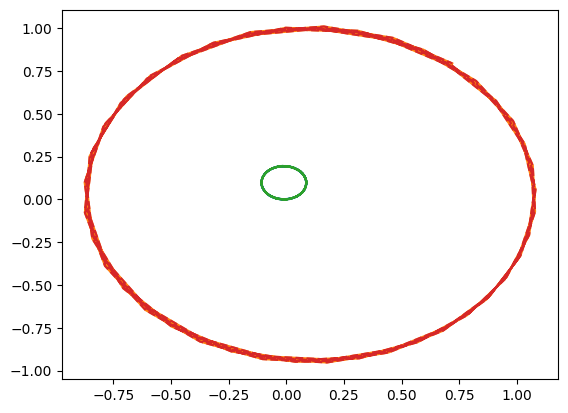

0


In [155]:
N = 100
t = 200

pb1 = Particle((0,0,0), (-0.8,0,0), 10000, 0)
pb2 = Particle((0,1,0), (0.8,0,0), 1000, 0)
ps = System([b1, b2], t)
pxs1 = []
pys1 = []
pxs2 = []
pys2 = []

db1 = Particle((0,0,0), (-0.8,0,0), 10000, 0)
db2 = Particle((0,1,0), (0.8,0,0), 1000, 0)
ds = System([b1, b2], t)
dxs1 = []
dys1 = []
dxs2 = []
dys2 = []

for i in range(0, 0):
    ps.primitive_step()
    ds.first_diff_step()

for i in range(0, N):
    pxs1.append(s.particles[0].position[0])
    pys1.append(s.particles[0].position[1])
    pxs2.append(s.particles[1].position[0])
    pys2.append(s.particles[1].position[1])

    dxs1.append(s.particles[0].position[0])
    dys1.append(s.particles[0].position[1])
    dxs2.append(s.particles[1].position[0])
    dys2.append(s.particles[1].position[1])

    ps.primitive_step()
    
    ds.first_diff_step()

plt.plot(pxs1, pys1, "-")
plt.plot(pxs2, pys2, "-")
plt.plot(dxs1, dys1, "--")
plt.plot(dxs2, dys2, "--")
plt.show()
print(pb2.distance(db2))

In [129]:
a = Particle((100,0,0), (0,0.0001,0), 0.5, 0.000000001)
b = Particle((0,0,0), (0,0.0001,0), 0.5, 0.000000001)
s = System([a, b], 100)

xs = [[], []]
ys = [[], []]
zs = [[], []]

n = range(0, 10000)
for i in n:
    xs[0].append(s.particles[0].position[0])
    ys[0].append(s.particles[0].position[1])
    zs[0].append(s.particles[0].position[2])
    xs[1].append(s.particles[1].position[0])
    ys[1].append(s.particles[1].position[1])
    zs[1].append(s.particles[1].position[2])
    s.step()
    #resistance
    for i in range(0, len(s.particles)):
        p = s.particles[i]
        p.inertia[0] = p.inertia[0] * 0.9
        p.inertia[2] = p.inertia[2] * 0.9
        s.particles[i] = p

plt.plot(xs[0], ys[0])
plt.plot(xs[1], ys[1])

AttributeError: 'System' object has no attribute 'step'

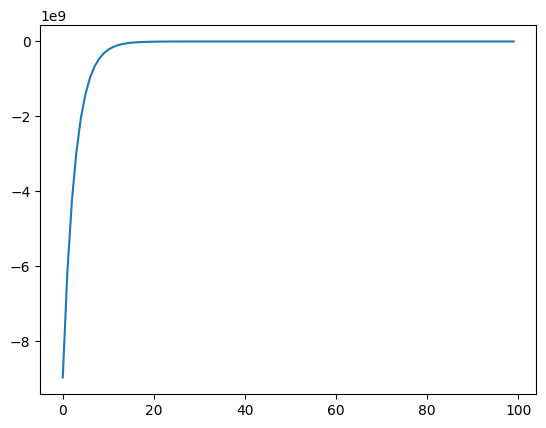

In [3]:
center = Particle((0,0,0), (0, 0, 0), 1, 1)
vals = []
for i in np.logspace(0, 8, 100):
    p = Particle((i,0,0), (0,0,0), 1, 1)
    vals.append(center.force(p))
    
plt.plot(vals)

In [4]:
from typing import Tuple
import numpy as np
import matplotlib.pyplot as plt
import math

class PointMass:
    def __init__(self, weight: float, position: Tuple[float, float, float], inertia: Tuple[float, float, float]):
        self.weight = weight
        self.position = np.array(position)
        self.inertia = np.array(inertia)

    def distanceTo(self, point_mass: "PointMass") -> float:
        return np.linalg.norm(self.position - point_mass.position)
    
    def velocityTo(self, point_mass: "PointMass") -> float:
        return np.linalg.norm(self.inertia - point_mass.inertia)

    def directionTo(self, point_mass: "PointMass") -> Tuple[float, float, float]:
        return (point_mass.position - self.position) / self.distanceTo(point_mass)
    
    def applyForce(self, f: Tuple[float, float, float], t: float):
        self.inertia = self.inertia + f * t / self.weight

    def move(self, t: float):
        self.position = self.position + self.inertia * t

class Spring:
    def __init__(self, start_point: PointMass, end_point: PointMass, spring_constant: float, length: float):
        self.start_point = start_point
        self.end_point = end_point
        self.spring_constant = spring_constant
        self.length = length
        
    def force(self) -> float:
        return (self.length - self.start_point.distanceTo(self.end_point)) * self.spring_constant

    def applyForce(self, t: float):
        direction = self.start_point.directionTo(self.end_point)
        f = self.force() * direction
        self.start_point.applyForce(-f, t)
        self.end_point.applyForce(f, t)
        
class Damper:
    def __init__(self, start_point: PointMass, end_point: PointMass, resistance: float):
        self. start_point = start_point
        self.end_point = end_point
        self.resistance = resistance
        
    def force(self) -> float:
        return self.start_point.velocityTo(self.end_point)
        
    def applyForce(self, t: float):
        direction = self.start_point.directionTo(self.end_point)
        f = self.force()
        
class SpringsAndJoints:
    def __init__(self, springs: [Spring], joints: [PointMass]):
        self.springs = springs
        self.joints = joints

    def step(self, t: float):
        for i in range(0, len(self.springs)):
            self.springs[i].applyForce(t)

        for i in range(0, len(self.joints)):
            self.joints[i].move(t)

    def applyGravity(self, t: float):
        for i in range(0, len(self.joints)):
            self.joints[i].inertia = self.joints[i].inertia + np.array((0, -0.01, 0))
        
    def boundingBox(self, box: Tuple[float, float, float, float, float, float]):
        for i in range(0, len(self.joints)):
            t = self.joints[i]
            for j in range(0, len(t.position)):
                if t.position[j] < box[2*j]:
                    self.joints[i].position[j] = box[2*j]
                    self.joints[i].inertia = np.array((0, 0, 0))
                if t.position[j] > box[2*j+1]:
                    self.joints[i].position[j] = box[2*j+1]
                    self.joints[i].inertia = np.array((0, 0, 0))
                    
    def applyResistance(self, t: float):
        for i in range(0, len(self.joints)):
            self.joints[i].inertia = self.joints[i].inertia * 0.9**t
            
    def show(self):
        for s in self.springs:
            xs = [s.start_point.position[0], s.end_point.position[0]]
            ys = [s.start_point.position[1], s.end_point.position[1]]
            zs = [s.start_point.position[2], s.end_point.position[2]]
            plt.plot(xs, ys)

KeyboardInterrupt: 

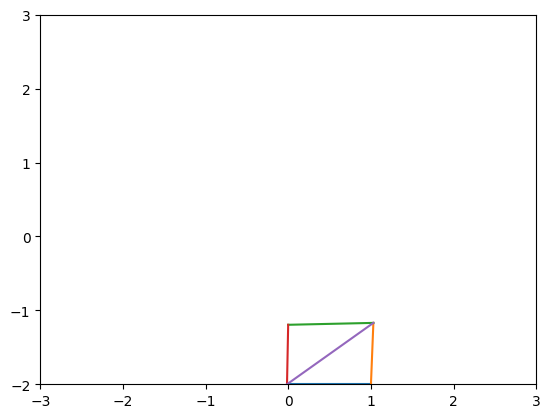

In [5]:
p1 = PointMass(1, (0, 0, 0), (0, 0, 0))
p2 = PointMass(1, (1, 0, 0), (0, 0, 0))
p3 = PointMass(1, (1, 1, 0), (0, 0, 0))
p4 = PointMass(1, (0, 1, 0), (0, 0, 0))
s1 = Spring(p1, p2, 5, 1)
s2 = Spring(p2, p3, 5, 1)
s3 = Spring(p3, p4, 5, 1)
s4 = Spring(p4, p1, 5, 1)
s5 = Spring(p1, p3, 10, 1.41)
saj = SpringsAndJoints([s1, s2, s3, s4, s5], [p1, p2, p3, p4])
for i in range(0, 250):
    if i % 1 == 0:
        plt.axes(xlim =(-3, 3), ylim =(-2, 3))  
        saj.show()
        plt.savefig("video/" + str(i).zfill(4))
        plt.close()
    saj.step(0.1)
    saj.applyResistance(0.1)
    saj.applyGravity(0.1)
    saj.boundingBox((-5, 5, -2, 5, 0, 0))
    

In [ ]:
center = PointMass(10, (0, 0, 0), (0, 0, 0))
wing1 = PointMass(4, (1, -1, 0), (0, 0, -0.33))
wing2 = PointMass(4, (1, 1, 0), (0, 0, 0.3))

sc1 = Spring(center, wing1, 50, math.sqrt(2))
sc2 = Spring(center, wing2, 50, math.sqrt(2))
s12 = Spring(wing1, wing2, 50, 2)
fluegelmutter = SpringsAndJoints([sc1, sc2, s12], [center, wing1, wing2])

frames = 2000
iters = 10
for i in range(0, frames):
    if i % iters == 0:
        plt.axes(xlim =(-3, 3), ylim =(-3, 3))  
        fluegelmutter.show()
        plt.savefig("video/" + str(i).zfill(4))
        plt.close()
    fluegelmutter.step(0.1)